# **NETTOYAGE DES DONNÉES** 

## **1. Importation des données**

#### Création d'un lien avec un Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import de modules Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importation et affichage des dataframes

In [ ]:
path = "/content/drive/MyDrive/Bureau d'étude/Codes/Données/"

df_BasicInfo = pd.read_csv(path + "BasicInfo.csv")
df_DataDescr = pd.read_csv(path + "DataDescription.csv")
df_IndoorTemp = pd.read_csv(path + "IndoorTemperature.csv")
df_OutdoorTemp = pd.read_csv(path + "OutdoorTemperature.csv")
df_Scada = pd.read_csv(path + "Scada.csv")
#df_Tfake = pd.read_csv(path + "TFake.csv")

In [ ]:
df_BasicInfo.drop_duplicates(inplace=True, ignore_index=True)
df_BasicInfo

,skidID,area,buildingTypeEN,heatTypeEN,energyType
0,SSH0000574,45871.6100,Residential,FH,Y
1,SSH0000198,122760.0500,Residential,Radiator,Y
2,SSH0000457,73812.9100,Residential,FH,Y
3,SSH0000381,100816.2700,Residential,FH,Y
4,SSH0000402,27081.2431,Residential,Radiator,Y
5,SSH0000275,51617.3600,Residential,Radiator,Y
6,SSH0000353,9654.0700,Residential,FH,Y
7,SSH0000449,102630.4100,Residential,Radiator,N
8,SSH0000068,24652.1500,Residential,FH,Y
9,SSH0000061,18402.2962,Residential,Radiator,Y


In [ ]:
df_DataDescr

,Variable Name,Data type,Unit,Description
0,skidID,string,NaN,substation name
1,area,float,m²,heating area of substation
2,buildingTypeEN,string,NaN,building type
3,heatTypeEN,string,NaN,"heating type (FH: Floor Heating, Radiator)"
4,energyTypeEN,string,NaN,buildings thermal insulation (Y: good insulati...
5,DT,datetime,NaN,measurement datetime
6,IndoorTemp,float,°C,indoor temperature value
7,TT11,float,°C,water supply temperature - primary pipe
8,TT12,float,°C,back water temperature - primary pipe
9,TT21,float,°C,water supply temperature - secondary pipe


In [ ]:
df_IndoorTemp.drop_duplicates(inplace=True, ignore_index=True)
df_IndoorTemp.head()

,skidID,DT,IndoorTemp
0,SSH0000574,2019-10-20 00:07:00,21.49
1,SSH0000574,2019-10-20 00:17:00,21.47
2,SSH0000574,2019-10-20 00:27:00,21.30
3,SSH0000574,2019-10-20 00:37:00,21.43
4,SSH0000574,2019-10-20 00:47:00,21.45


In [ ]:
df_OutdoorTemp.drop_duplicates(inplace=True, ignore_index=True)
df_OutdoorTemp.head()

,DT,OutdoorTemp
0,2019-10-20 00:00:00,8
1,2019-10-20 00:05:00,8
2,2019-10-20 00:10:00,9
3,2019-10-20 00:15:00,9
4,2019-10-20 00:20:00,9


In [ ]:
df_Scada.drop_duplicates(inplace=True, ignore_index=True)
print(df_Scada.head(1))
del df_Scada['Unnamed: 0']
print(df_Scada.shape)
df_Scada.head()

   Unnamed: 0      skidID                   DT  ...  TT22  Debit  Puissance
0           0  SSH0000574  2019-10-20 00:02:00  ...  28.4    9.9        0.6

[1 rows x 9 columns]
(905334, 8)


,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance
0,SSH0000574,2019-10-20 00:02:00,80.1,31.7,31.1,28.4,9.9,0.6
1,SSH0000574,2019-10-20 00:08:00,80.1,32.0,31.1,28.4,10.7,0.6
2,SSH0000574,2019-10-20 00:13:00,79.9,31.7,31.1,28.4,10.1,0.6
3,SSH0000574,2019-10-20 00:18:00,79.9,31.3,30.9,28.4,9.0,0.5
4,SSH0000574,2019-10-20 00:23:00,79.9,30.8,30.7,28.4,8.3,0.5


In [ ]:
#df_Tfake.head()

## **2. Nettoyage**

**Objectif : créer un grand data frame regroupant toutes les informations**

### 2.a. Uniformisation des dates

On veut avoir des données toutes les 10 minutes et une seule donnée toute les 10 minutes. Pour IndoorTemp c'est déjà presque le cas, pour les autres on moyenne un peu plus ce qui n'est pas dérangeant sur une période aussi proche.

In [ ]:
df_IndoorTemp['DT'] = pd.to_datetime(df_IndoorTemp['DT'], format='%Y-%m-%d %H:%M:%S').dt.ceil('10min') #round('10min')    'ceil' plutôt que 'round' pour s'assurer que les dates se suivent bien
df_OutdoorTemp['DT'] = pd.to_datetime(df_OutdoorTemp['DT'], format='%Y-%m-%d %H:%M:%S').dt.ceil('10min') #round('10min')
df_Scada['DT'] = pd.to_datetime(df_Scada['DT'], format='%Y-%m-%d %H:%M:%S').dt.ceil('10min') #round('10min')

In [ ]:
print('Avant (OutdoorTemp) :', df_OutdoorTemp.shape)
df_temp = df_OutdoorTemp.groupby('DT').mean()
df_temp['DT'] = df_temp.index
df_temp.index = range(df_temp.shape[0])
df_OutdoorTemp = df_temp
del df_temp
print('Après (OutdoorTemp) :', df_OutdoorTemp.shape)

Avant (OutdoorTemp) : (38865, 2)
Après (OutdoorTemp) : (25568, 2)


In [ ]:
print('Avant (IndoorTemp) :', df_IndoorTemp.shape)
print('Avant (Scada)      :', df_Scada.shape)
df_temp1 = df_IndoorTemp.copy()
df_temp2 = df_Scada.copy()
df_IndoorTemp.drop(range(df_IndoorTemp.shape[0]), inplace=True)
df_Scada.drop(range(df_Scada.shape[0]), inplace=True)

for skid in sorted(set(df_temp1['skidID'])):
  df_local1 = df_temp1[df_temp1.skidID==skid].groupby('DT').mean()
  df_local1['skidID'] = skid
  df_local1['DT'] = df_local1.index
  df_IndoorTemp = pd.concat([df_IndoorTemp,df_local1], ignore_index=True)
  
  df_local2 = df_temp2[df_temp2.skidID==skid].groupby('DT').mean()
  df_local2['skidID'] = skid
  df_local2['DT'] = df_local2.index
  df_Scada = pd.concat([df_Scada,df_local2], ignore_index=True)

del df_local1, df_local2, df_temp1, df_temp2

print('Après (IndoorTemp) :', df_IndoorTemp.shape)
print('Après (Scada)      :', df_Scada.shape)

Avant (IndoorTemp) : (463945, 3)
Avant (Scada)      : (905334, 8)
Après (IndoorTemp) : (463875, 3)
Après (Scada)      : (457299, 8)


In [ ]:
df_IndoorTemp.head(3)

,skidID,DT,IndoorTemp
0,SSH0000001,2019-10-20 00:10:00,19.31
1,SSH0000001,2019-10-20 00:20:00,19.44
2,SSH0000001,2019-10-20 00:30:00,19.49


In [ ]:
df_OutdoorTemp.head(3)

,OutdoorTemp,DT
0,8.0,2019-10-20 00:00:00
1,8.5,2019-10-20 00:10:00
2,9.0,2019-10-20 00:20:00


In [ ]:
df_Scada.head(3)

,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance
0,SSH0000001,2019-10-20 00:10:00,81.9,37.2,35.5,31.0,54.90,3.0
1,SSH0000001,2019-10-20 00:20:00,82.2,37.2,35.5,31.0,66.60,3.6
2,SSH0000001,2019-10-20 00:30:00,82.2,37.2,35.5,31.0,56.25,3.1


### 2.b. Merger les dataframes

In [ ]:
# Suppression de données aberrantes : puissance nulles
# on enlève ainsi aussi deux skids pour lesquels toutes les puissance étaient nulles : SSH0000061 et SSH0000288    

df_Scada = df_Scada[df_Scada.Puissance != 0].copy()
df_Scada.index = range(df_Scada.shape[0])

In [ ]:
df_data = df_Scada.merge(df_IndoorTemp, how='inner', on=['DT','skidID']) # inner supprime dès ici les lignes pour lesquels on a pas toutes les informations, sinon on pourrait utiliser outer
df_data = df_data.merge(df_OutdoorTemp, how='inner', on='DT')
df_data

,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance,IndoorTemp,OutdoorTemp
0,SSH0000001,2019-10-20 00:10:00,81.900,37.20,35.500,31.00,54.90,3.000,19.31,8.5
1,SSH0000068,2019-10-20 00:10:00,80.100,27.10,27.700,25.20,3.90,0.200,19.99,8.5
2,SSH0000198,2019-10-20 00:10:00,79.660,29.07,31.700,28.60,23.50,1.385,18.96,8.5
3,SSH0000218,2019-10-20 00:10:00,79.660,29.24,29.240,26.74,5.00,0.380,20.83,8.5
4,SSH0000241,2019-10-20 00:10:00,79.315,29.35,27.605,27.03,6.50,0.385,19.29,8.5
...,...,...,...,...,...,...,...,...,...,...
386608,SSH0000341,2020-01-29 10:20:00,114.800,46.30,38.600,34.10,16.60,1.300,21.13,-11.0
386609,SSH0000381,2020-01-29 10:20:00,115.800,48.40,41.300,33.80,33.80,2.800,24.28,-11.0
386610,SSH0000449,2020-01-29 10:20:00,114.400,46.20,48.400,41.30,50.80,4.000,20.45,-11.0
386611,SSH0000353,2020-04-01 11:00:00,78.100,25.40,26.400,24.60,1.20,0.100,20.75,9.0


In [ ]:
df_data = df_data.merge(df_BasicInfo, how='inner', on="skidID")
df_data

,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance,IndoorTemp,OutdoorTemp,area,buildingTypeEN,heatTypeEN,energyType
0,SSH0000001,2019-10-20 00:10:00,81.9,37.20,35.50,31.0,54.90,3.00,19.31,8.5,314568.48,Residential,Radiator,Y
1,SSH0000001,2019-10-20 00:20:00,82.2,37.20,35.50,31.0,66.60,3.60,19.44,9.0,314568.48,Residential,Radiator,Y
2,SSH0000001,2019-10-20 00:30:00,82.2,37.20,35.50,31.0,56.25,3.10,19.49,9.0,314568.48,Residential,Radiator,Y
3,SSH0000001,2019-10-20 00:40:00,81.6,37.20,35.50,31.0,61.65,3.35,19.34,10.0,314568.48,Residential,Radiator,Y
4,SSH0000001,2019-10-20 00:50:00,81.5,37.20,35.30,31.0,61.20,3.30,19.48,10.0,314568.48,Residential,Radiator,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386608,SSH0000121,2020-03-23 12:50:00,80.1,31.10,32.45,28.9,0.75,0.30,23.80,0.5,4934.88,Residential,Radiator,N
386609,SSH0000121,2020-03-28 07:00:00,81.5,30.50,31.85,28.5,0.70,0.30,23.94,4.0,4934.88,Residential,Radiator,N
386610,SSH0000121,2020-03-30 03:00:00,73.2,27.40,26.85,25.9,0.70,0.35,24.36,9.0,4934.88,Residential,Radiator,N
386611,SSH0000121,2020-04-03 08:10:00,79.2,27.00,29.10,26.3,0.40,0.25,23.41,1.0,4934.88,Residential,Radiator,N


### 2.c. Création de nouvelles variables

In [ ]:
print('Avant :',df_data.shape, ' (Y a t-il des doublons ?)')
df_data.drop_duplicates(inplace=True, ignore_index=True)

df_data['Puissance_surf'] = df_data['Puissance']/df_data['area'] * 10**6
df_data['day_moment'] = df_data['DT'].map(lambda date: int(date.hour/2)+1)
df_data['skidType'] = df_data['buildingTypeEN'].map(lambda s: s[:5]) + "_" + df_data['heatTypeEN'].map(lambda s: s[:3]) + "_" + df_data['energyType'].map(lambda s: 'GoodIns' if s=='Y' else 'BadIns')
df_data.drop(columns=['buildingTypeEN','heatTypeEN','energyType'], inplace=True)

print('Après :',df_data.shape)
df_data

Avant : (386613, 14)  (Y a t-il des doublons ?)
Après : (386613, 14)


,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance,IndoorTemp,OutdoorTemp,area,Puissance_surf,day_moment,skidType
0,SSH0000001,2019-10-20 00:10:00,81.9,37.20,35.50,31.0,54.90,3.00,19.31,8.5,314568.48,9.536874,1,Resid_Rad_GoodIns
1,SSH0000001,2019-10-20 00:20:00,82.2,37.20,35.50,31.0,66.60,3.60,19.44,9.0,314568.48,11.444249,1,Resid_Rad_GoodIns
2,SSH0000001,2019-10-20 00:30:00,82.2,37.20,35.50,31.0,56.25,3.10,19.49,9.0,314568.48,9.854770,1,Resid_Rad_GoodIns
3,SSH0000001,2019-10-20 00:40:00,81.6,37.20,35.50,31.0,61.65,3.35,19.34,10.0,314568.48,10.649509,1,Resid_Rad_GoodIns
4,SSH0000001,2019-10-20 00:50:00,81.5,37.20,35.30,31.0,61.20,3.30,19.48,10.0,314568.48,10.490562,1,Resid_Rad_GoodIns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386608,SSH0000121,2020-03-23 12:50:00,80.1,31.10,32.45,28.9,0.75,0.30,23.80,0.5,4934.88,60.791752,7,Resid_Rad_BadIns
386609,SSH0000121,2020-03-28 07:00:00,81.5,30.50,31.85,28.5,0.70,0.30,23.94,4.0,4934.88,60.791752,4,Resid_Rad_BadIns
386610,SSH0000121,2020-03-30 03:00:00,73.2,27.40,26.85,25.9,0.70,0.35,24.36,9.0,4934.88,70.923710,2,Resid_Rad_BadIns
386611,SSH0000121,2020-04-03 08:10:00,79.2,27.00,29.10,26.3,0.40,0.25,23.41,1.0,4934.88,50.659793,5,Resid_Rad_BadIns


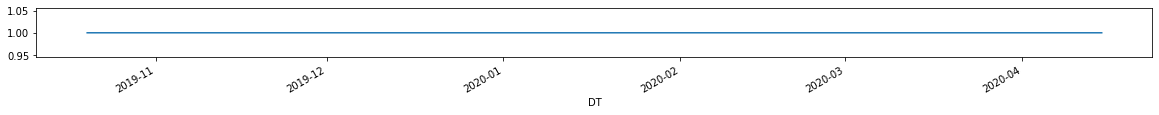

In [ ]:
# Une date n'est présente qu'une seule fois pour chacun des skid
df_data[df_data.skidID == 'SSH0000001'].groupby('DT').skidID.count().plot(figsize=(20,1))
plt.show()

In [ ]:
df_dates = pd.DataFrame({'DT' : pd.date_range(df_data['DT'].min(), df_data['DT'].max(), freq='10min')}) # range de dates allant de la première date observée à la dernière date observée dans les données

df_temp = df_data.copy()
df_data.drop(range(df_data.shape[0]), inplace=True)

for skid in sorted(set(df_temp['skidID'])):

  df_local = df_temp[df_temp['skidID']==skid].copy()
  df_local.index = range(df_local.shape[0])

  df_local = df_dates.merge(df_local, how='outer', on='DT') # Permet d'avoir un dataframe avec des dates toutes les 10min et également de ranger les données dans l'ordre chronologique

  df_local['Puissance_surf'] = df_local['Puissance_surf'].rolling(6, center=True, min_periods=2).mean()  # Moving average sur 6 données (ça correspond ici à 1h)
  df_local['IndoorTemp'] = df_local['IndoorTemp'].rolling(6, center=True, min_periods=2).mean()

  df_local['Puissance_surf_030'] = pd.Series([np.nan]).append(df_local['Puissance_surf'].rolling(3, min_periods=2).mean()[:-1], ignore_index=True)  # Puissance moyenne passée sur les 30 dernières minutes
  df_local['Puissance_surf_060'] = pd.Series([np.nan]).append(df_local['Puissance_surf'].rolling(6, min_periods=3).mean()[:-1], ignore_index=True)
  df_local['Puissance_surf_090'] = pd.Series([np.nan]).append(df_local['Puissance_surf'].rolling(9, min_periods=4).mean()[:-1], ignore_index=True) 
  df_local['Puissance_surf_120'] = pd.Series([np.nan]).append(df_local['Puissance_surf'].rolling(12, min_periods=6).mean()[:-1], ignore_index=True) 
  
  df_local['IndoorTemp_030'] = pd.Series([np.nan]).append(df_local['IndoorTemp'].rolling(3, min_periods=2).mean()[:-1], ignore_index=True) # Température moyenne passée pour éviter de supprimer trop de données
  df_local['IndoorTemp_060'] = pd.Series([np.nan]).append(df_local['IndoorTemp'].rolling(6, min_periods=3).mean()[:-1], ignore_index=True)
  df_local['IndoorTemp_90to120'] = pd.Series([np.nan for i in range(10)]).append(df_local['IndoorTemp'].rolling(3, min_periods=2).mean()[:-10], ignore_index=True) 
  df_local['deltaIndoorTemp'] = df_local['IndoorTemp_030'] - df_local['IndoorTemp_90to120']

  df_data = pd.concat([df_data,df_local], ignore_index=True)

del df_local, df_temp

print('Avant :',df_data.shape, ' (avec NaN ajouté à cause de dates manquantes)')
df_data.dropna(inplace=True)
df_data.index = range(df_data.shape[0])
print('Après :',df_data.shape)
df_data

Avant : (435744, 22)  (avec NaN ajouté à cause de dates manquantes)
Après : (380319, 22)


,skidID,DT,TT11,TT12,TT21,TT22,Debit,Puissance,IndoorTemp,OutdoorTemp,area,Puissance_surf,day_moment,skidType,Puissance_surf_030,Puissance_surf_060,Puissance_surf_090,Puissance_surf_120,IndoorTemp_030,IndoorTemp_060,IndoorTemp_90to120,deltaIndoorTemp
0,SSH0000001,2019-10-20 02:00:00,81.0,37.20,35.3,31.0,65.70,3.50,19.920000,12.0,314568.48,10.358105,2.0,Resid_Rad_GoodIns,10.278631,10.389011,10.424039,10.406030,19.895556,19.799722,19.404167,0.491389
1,SSH0000001,2019-10-20 02:10:00,81.1,37.20,35.3,31.0,54.00,2.95,19.915000,12.5,314568.48,10.384596,2.0,Resid_Rad_GoodIns,10.296292,10.362520,10.419918,10.402036,19.910000,19.850000,19.406778,0.503222
2,SSH0000001,2019-10-20 02:20:00,81.3,37.20,35.3,31.0,69.75,3.75,19.896667,13.0,314568.48,10.649509,2.0,Resid_Rad_GoodIns,10.287461,10.331614,10.416975,10.410867,19.916111,19.886667,19.424000,0.492111
3,SSH0000001,2019-10-20 02:30:00,81.6,37.20,35.3,31.0,60.75,3.25,19.896667,13.0,314568.48,10.887931,2.0,Resid_Rad_GoodIns,10.464070,10.371351,10.414031,10.434047,19.910556,19.903056,19.473444,0.437111
4,SSH0000001,2019-10-20 02:40:00,81.5,37.20,35.3,31.0,66.15,3.55,19.913333,13.0,314568.48,10.570035,2.0,Resid_Rad_GoodIns,10.640679,10.468485,10.455240,10.475108,19.902778,19.906389,19.542222,0.360556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380314,SSH0000574,2020-04-08 18:10:00,79.0,29.50,28.5,25.5,11.15,0.60,19.895000,2.0,45871.61,13.079986,10.0,Resid_FH_GoodIns,13.316152,13.403352,13.403352,12.612194,19.895500,19.898300,19.875000,0.020500
380315,SSH0000574,2020-04-11 21:40:00,64.8,28.90,27.8,24.4,13.40,0.55,20.680000,0.0,45871.61,11.553987,11.0,Resid_FH_GoodIns,11.505543,11.505543,9.295268,8.742699,20.660000,20.660000,20.770000,-0.110000
380316,SSH0000574,2020-04-11 21:50:00,64.8,28.80,27.7,24.4,12.70,0.50,20.683333,0.0,45871.61,11.444987,11.0,Resid_FH_GoodIns,11.541876,11.517654,10.040100,9.055064,20.665000,20.665000,20.770000,-0.105000
380317,SSH0000574,2020-04-11 22:00:00,64.7,28.90,27.8,24.6,13.35,0.55,20.688000,0.0,45871.61,11.553987,12.0,Resid_FH_GoodIns,11.481321,11.503121,10.766766,9.539508,20.676111,20.668667,20.770000,-0.093889


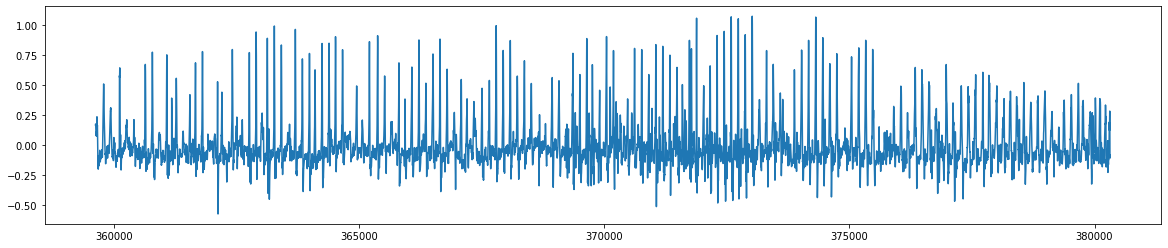

In [ ]:
df_data.loc[df_data.skidID=="SSH0000574",'deltaIndoorTemp'].plot(figsize=(20,4))

In [ ]:
#df_data.groupby('skidID')['DT'].count()

skidID
SSH0000001    24276
SSH0000068    23961
SSH0000121    18867
SSH0000198    20154
SSH0000218    23778
SSH0000241    18621
SSH0000258    23791
SSH0000275    23642
SSH0000339    20558
SSH0000341    23833
SSH0000353    23870
SSH0000381    22780
SSH0000402    23144
SSH0000449    23834
SSH0000457    22751
SSH0000518    23638
SSH0000574    20955
Name: DT, dtype: int64

### 2.d. Réorganisation des variables

In [ ]:
#df_data.columns
df_data = df_data[['skidID', 'DT', 'Puissance', 'IndoorTemp', 'OutdoorTemp', 'day_moment',
                   'Puissance_surf', 'Puissance_surf_030', 'Puissance_surf_060', 'Puissance_surf_090', 'Puissance_surf_120',
                   'IndoorTemp_030', 'IndoorTemp_060', 'IndoorTemp_90to120', 'deltaIndoorTemp',
                   'skidType', 'area',]]
df_data

,skidID,DT,Puissance,IndoorTemp,OutdoorTemp,day_moment,Puissance_surf,Puissance_surf_030,Puissance_surf_060,Puissance_surf_090,Puissance_surf_120,IndoorTemp_030,IndoorTemp_060,IndoorTemp_90to120,deltaIndoorTemp,skidType,area
0,SSH0000001,2019-10-20 02:00:00,3.50,19.920000,12.0,2.0,10.358105,10.278631,10.389011,10.424039,10.406030,19.895556,19.799722,19.404167,0.491389,Resid_Rad_GoodIns,314568.48
1,SSH0000001,2019-10-20 02:10:00,2.95,19.915000,12.5,2.0,10.384596,10.296292,10.362520,10.419918,10.402036,19.910000,19.850000,19.406778,0.503222,Resid_Rad_GoodIns,314568.48
2,SSH0000001,2019-10-20 02:20:00,3.75,19.896667,13.0,2.0,10.649509,10.287461,10.331614,10.416975,10.410867,19.916111,19.886667,19.424000,0.492111,Resid_Rad_GoodIns,314568.48
3,SSH0000001,2019-10-20 02:30:00,3.25,19.896667,13.0,2.0,10.887931,10.464070,10.371351,10.414031,10.434047,19.910556,19.903056,19.473444,0.437111,Resid_Rad_GoodIns,314568.48
4,SSH0000001,2019-10-20 02:40:00,3.55,19.913333,13.0,2.0,10.570035,10.640679,10.468485,10.455240,10.475108,19.902778,19.906389,19.542222,0.360556,Resid_Rad_GoodIns,314568.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380314,SSH0000574,2020-04-08 18:10:00,0.60,19.895000,2.0,10.0,13.079986,13.316152,13.403352,13.403352,12.612194,19.895500,19.898300,19.875000,0.020500,Resid_FH_GoodIns,45871.61
380315,SSH0000574,2020-04-11 21:40:00,0.55,20.680000,0.0,11.0,11.553987,11.505543,11.505543,9.295268,8.742699,20.660000,20.660000,20.770000,-0.110000,Resid_FH_GoodIns,45871.61
380316,SSH0000574,2020-04-11 21:50:00,0.50,20.683333,0.0,11.0,11.444987,11.541876,11.517654,10.040100,9.055064,20.665000,20.665000,20.770000,-0.105000,Resid_FH_GoodIns,45871.61
380317,SSH0000574,2020-04-11 22:00:00,0.55,20.688000,0.0,12.0,11.553987,11.481321,11.503121,10.766766,9.539508,20.676111,20.668667,20.770000,-0.093889,Resid_FH_GoodIns,45871.61


### 2.e. Visualisation des données

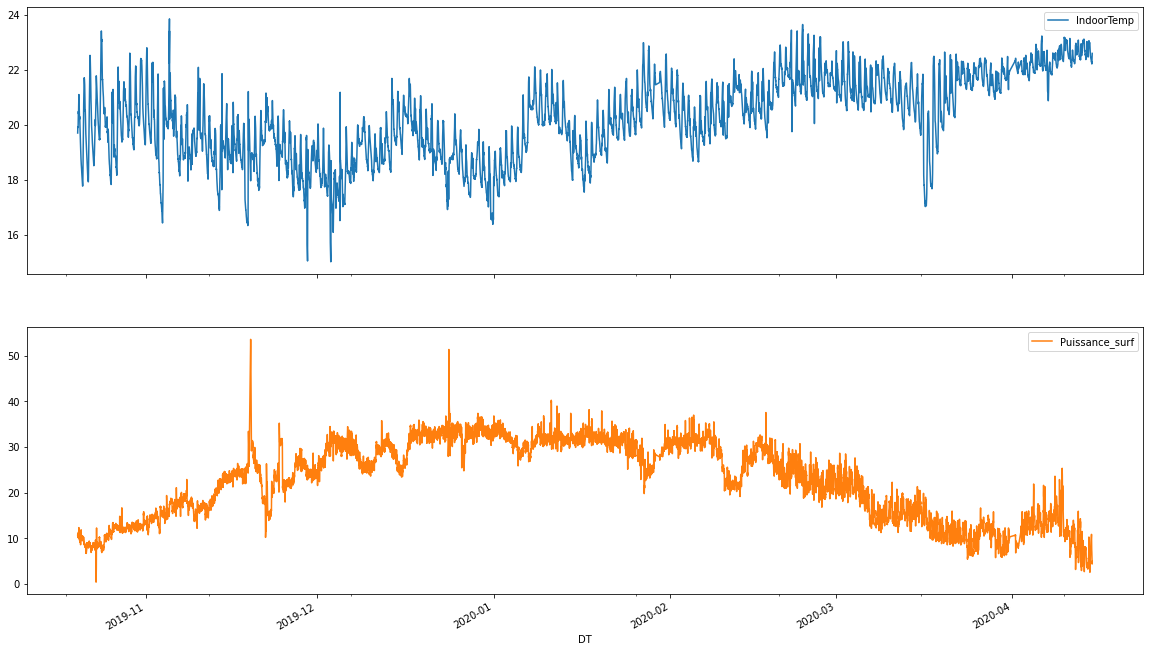

In [ ]:
df_data[df_data['skidID']=="SSH0000001"].plot(kind='line',x='DT',y=['IndoorTemp','Puissance_surf'], figsize=(20,12), subplots=True)
plt.show()

### 2.f. Export des données

In [ ]:
# Pour enregistrer les données
df_data.to_csv("/content/drive/MyDrive/Bureau d'étude/Codes/Données/données_Python.csv", index=False)

# ANNEXE - Récupérer des prévisisons météo

In [ ]:
import time
import datetime
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [ ]:
# Pour récupérer le bon url de la ville
# faire une recherche des balises <a><\a> et récupérer le lien depuis la bonne ville depuis la page de la Chine "https://www.meteoconsult.fr/carte-meteo/pays-38/previsions-meteo-chine-aujourdhui"
# Utiliser un truc comme ça :
# tag = BeautifulSoup('<b id="boldest">bold</b>', 'html.parser').b
# tag['id']

In [ ]:
url = "https://www.meteoconsult.fr/previsions-meteo/bulletin-detaille/ville-3040/previsions-meteo-zhengzhou-aujourdhui"
htmldoc = urllib.request.urlopen(url) 

# Pour laisser un peu de temps au serveur entre chaque requète pour ne pas être détecté
time.sleep(0.1)

# Stockage la page web dans une variable
www_meteoconsult_fr = BeautifulSoup(htmldoc, "html.parser")

On récupère donc finalement des températures extérieures pour les 24h prochaines heures

In [ ]:
# Blocs html contenant les horaires et les températures des prévisions météo sur les 24 prochaines heures, ainsi 
bloc_horaires = www_meteoconsult_fr.find_all("ul", "th hours")
bloc_temp_ext = www_meteoconsult_fr.find_all("span", "multi-tempe-celsius show")

# On extrait les valeurs des horaires ainsi que les température en degré Celsius
horaires = bloc_horaires[0].stripped_strings # récupération dans le bloc 'bloc_horaires' des strings différents de '\n' 
temp_ext = [list(b.stripped_strings)[0] for b in bloc_temp_ext] # récupération dans le bloc 'bloc_temp_ext' des strings différents de '\n'

#horaires = [c[:2] for c in list(horaires)]  # convertion des horaires de strings en entiers
temp_ext = [int(t) for t in temp_ext[4:28]] # convertion en entier des températures en n'en prenant que 1 sur 2 ([::2]) car les autres valeurs sont en Fahrenheit

df_predOutdoorTemp = pd.DataFrame({"horaires" : horaires, "OutdoorTemp" : temp_ext})
df_predOutdoorTemp

,horaires,OutdoorTemp
0,22h,14
1,23h,14
2,00h,14
3,01h,13
4,02h,13
5,03h,13
6,04h,14
7,05h,14
8,06h,15
9,07h,17


In [ ]:
## Ajout d'une colonne 'time' au dataframe précédent utilisant la fonction 'stringDate2numberOfDays' codée plus haut

date_pred = datetime.date.today() # contiendra le premier jour pour lequel on récupère les prédictions de températures (aujourd'hui aux décalages horaires près)

# Pour corriger la valeur de 'date_pred' dans le cas d'un décalage horaire (en Chine le jour commence plus tôt qu'en France, aux États-Unis plus tard qu'en France)
day_number = int(www_meteoconsult_fr.find_all("div","tl-day-number")[0].string) # numéro du premier jour pour lequel on récupère les prédictions
if (date_pred + datetime.timedelta(days = 1)).day == day_number:
  date_pred = date_pred + datetime.timedelta(days = 1)
elif (date_pred + datetime.timedelta(days = -1)).day == day_number:
  date_pred = date_pred + datetime.timedelta(days = -1)

date_pred = date_pred.isoformat() # Convertion en string de 'date_pred' qui était de type 'datetime'

df_predOutdoorTemp['time'] = df_predOutdoorTemp['horaires'].map(lambda h : stringDate2numberOfDays(date_pred + " " + h[:2] + ":00:00"))
df_predOutdoorTemp

NameError: ignored